In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"Gold_data.csv")
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [5]:
# convert date column into datetime format
df['date'] = pd.to_datetime(df['date'])
df

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [6]:
# set date column as index
df.set_index('date',inplace=True)

In [7]:
df_price = pd.DataFrame(df['price'],columns=['price'])
df_price

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


# ARIMA MODEL

In [8]:
#!pip install pmdarima
from pmdarima import auto_arima


In [9]:
stepwise_fit = auto_arima(df_price.price, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26623.835, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26849.714, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26851.587, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26851.536, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26847.869, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26631.605, Time=1.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26635.529, Time=1.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26625.835, Time=2.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26625.835, Time=3.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=26662.140, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26629.134, Time=2.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26633.886, Time=2.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=26613.890, Time=3.50 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=26592.603, Time=4.11 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2182
Model:               SARIMAX(5, 1, 5)   Log Likelihood              -13266.584
Date:                Tue, 17 Jan 2023   AIC                          26557.168
Time:                        12:58:30   BIC                          26625.418
Sample:                    01-01-2016   HQIC                         26582.118
                         - 12-21-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4344      0.556      0.781      0.435      -0.656       1.525
ar.L1         -0.5034      0.019    -26.166      0.000      -0.541      -0.466
ar.L2         -0.5370      0.022    -23.895      0.000      -0.581      -0.493
ar.L3         -0.0456      0.028     -1.633      0.103      -0.100       0.009
ar.L4          0.0493      0.021      2.298      0.022       0.007       0.091
ar.L5          0.7701      0.017     45.854      0.000       0.737       0.803
ma.L1          0.3557      0.015     24.028      0.000       0.327       0.385
ma.L2          0.2719      0.016     17.525      0.000       0.241       0.302
ma.L3         -0.2300      0.016    -14.461      0.000      -0.261      -0.199
ma.L4         -0.3002      0.014    -21.566      0.000      -0.327      -0.273
ma.L5         -0.9218      0.012    -77.606      0.000      -0.945      -0.899
sigma2       1.19e+04    181.632     65.509      0.000    1.15e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                  10.12   Jarque-Bera (JB):             36328.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.46   Skew:                            -1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
final_arima_model = sm.tsa.ARIMA(df_price['price'],order = (5,1,5))
arima_fit_final = final_arima_model.fit()


In [11]:
# forecast for next 30 days

forecast = arima_fit_final.predict(len(df_price), len(df_price)+29)
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['price']
forecast_df

,price
2021-12-22,4375.410605
2021-12-23,4368.048189
2021-12-24,4363.181071
2021-12-25,4358.216029
2021-12-26,4308.340021
2021-12-27,4359.440566
2021-12-28,4353.703905
2021-12-29,4327.782505
2021-12-30,4336.553094
2021-12-31,4309.447833


In [12]:
# Set appropriate date as index for plotting forecast data

datetime = pd.date_range('2021-12-22', periods=30,freq='B')
date_df = pd.DataFrame(datetime,columns=['date'])

data_forecast = forecast_df.set_index(date_df.date)
data_forecast

,price
date,
2021-12-22,4375.410605
2021-12-23,4368.048189
2021-12-24,4363.181071
2021-12-27,4358.216029
2021-12-28,4308.340021
2021-12-29,4359.440566
2021-12-30,4353.703905
2021-12-31,4327.782505
2022-01-03,4336.553094


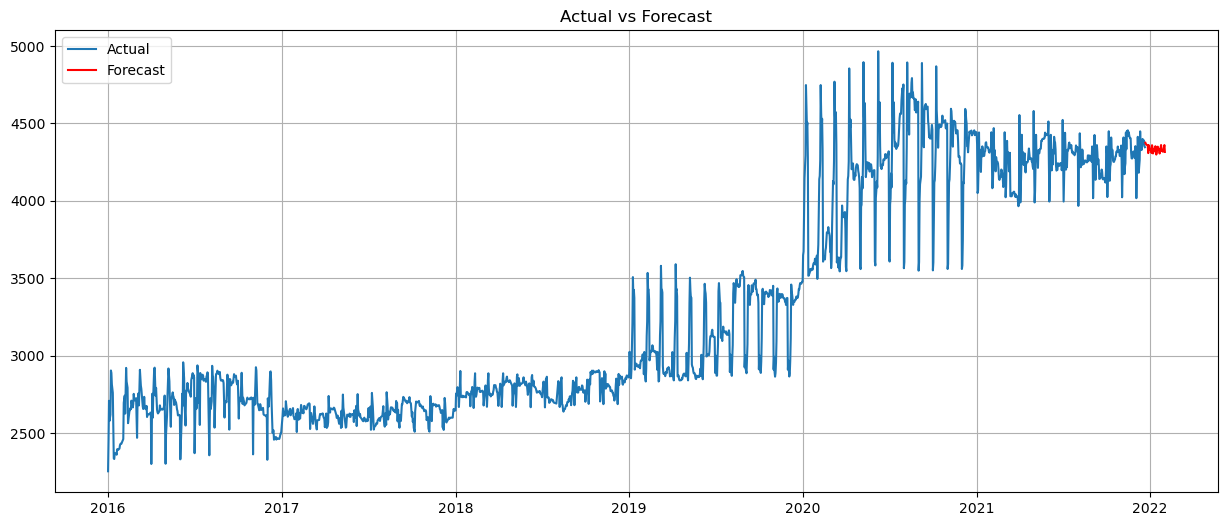

In [13]:
plt.figure(figsize=(15,6), dpi=100)
plt.plot(df_price, label = 'Actual')
plt.plot(data_forecast, label='Forecast',color='red')
plt.title('Actual vs Forecast')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

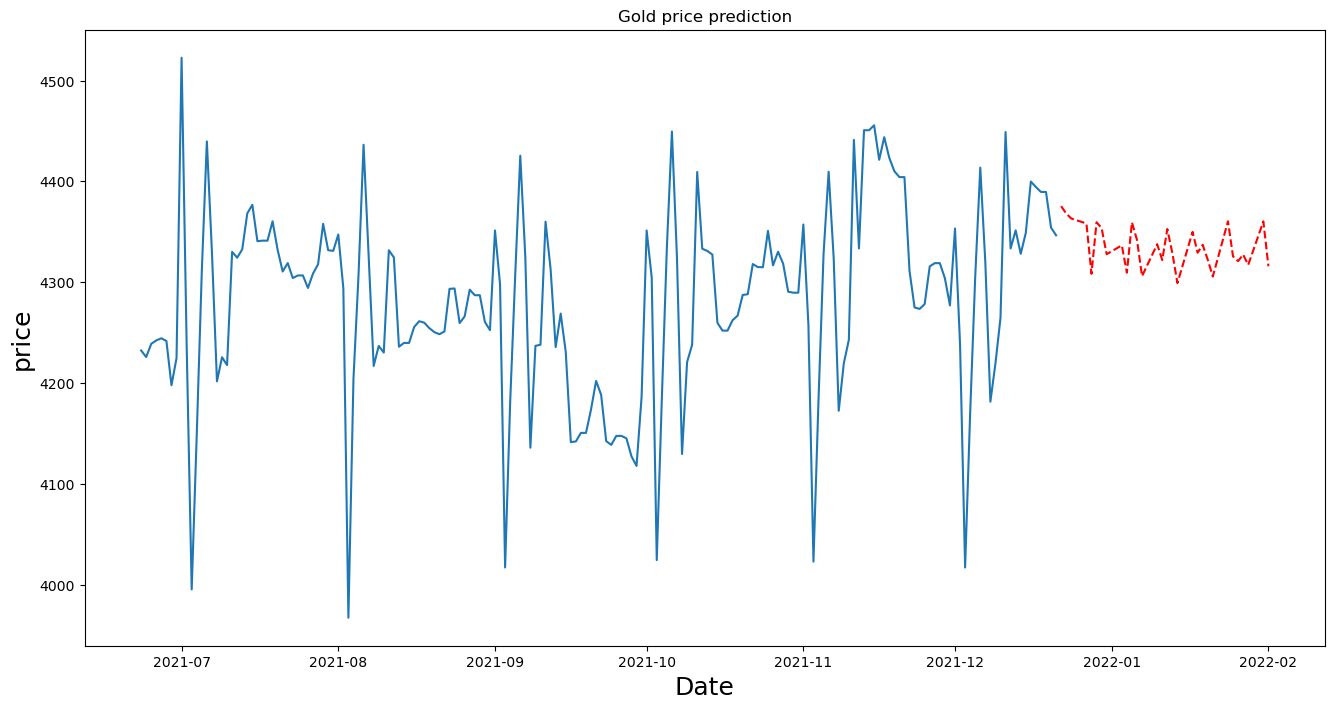

In [14]:
plt.figure(figsize=(16,8))
plt.title('Gold price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price' ,fontsize=18)
plt.plot(df['price'][2000:])
plt.plot(data_forecast[['price']],"r--")

# Deployment

In [15]:
from pickle import dump

In [16]:
dump(arima_fit_final,open('arima_fit_final.sav','wb'))

In [17]:
dump(df_price,open('df_price.sav','wb'))
dump(datetime,open('datetime.sav','wb'))